# Generators, data loading and other necessary pre tasks

In [1]:
# Importing required libraries
import pandas as pd
import os

# Define the directories for plantvillage and plantdoc
base_dir = r'C:\Users\bheja\OneDrive\Desktop\Dataset'
plant_vil_dir = os.path.join(base_dir, 'plantvillage')
plant_doc_dir = os.path.join(base_dir, 'plantdoc')

# Load the CSV files
train_csv_path = os.path.join(base_dir, 'PV_train.csv')
test_seen_csv_path = os.path.join(base_dir, 'PV_test_seen.csv')
test_unseen_csv_path = os.path.join(base_dir, 'PV_test_unseen.csv')
doc_unseen_csv_path = os.path.join(base_dir, 'PD_test_unseen.csv')

# Read the CSV files into pandas DataFrames
train_data = pd.read_csv(train_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])
test_seen_data = pd.read_csv(test_seen_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])
test_unseen_data = pd.read_csv(test_unseen_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])
doc_unseen_data = pd.read_csv(doc_unseen_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])

In [2]:
# Print the data types of the columns in the DataFrame
print("Data types of columns in train_data:")
print(train_data.dtypes)

# Print the data types for the specific columns (crop_class and disease_class)
print("\nData type of 'crop_class' column:", train_data["crop_class"].dtype)
print("Data type of 'disease_class' column:", train_data["disease_class"].dtype)

Data types of columns in train_data:
image_name       object
crop_class        int64
disease_class     int64
dtype: object

Data type of 'crop_class' column: int64
Data type of 'disease_class' column: int64


In [3]:
train_data["crop_class"] = train_data["crop_class"].astype(str)
test_seen_data["crop_class"] = test_seen_data["crop_class"].astype(str)
test_unseen_data["crop_class"] = test_unseen_data["crop_class"].astype(str)
doc_unseen_data["crop_class"] = doc_unseen_data["crop_class"].astype(str)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data augmentation generator for training
train_datagen_crop = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create data generator for testing --without augmentation, only rescale--
test_datagen_crop = ImageDataGenerator(rescale=1./255)

# Create the training data generator
train_generator_crop = train_datagen_crop.flow_from_dataframe(
    dataframe=train_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="crop_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Use the class indices from the training generator
classes_list = list(train_generator_crop.class_indices.keys())

# Use the same classes_list to ensure consistency in the testing generators
test_seen_generator_crop = test_datagen_crop.flow_from_dataframe(
    dataframe=test_seen_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="crop_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_list,  # Using the same classes as training generator
    shuffle=False
)

test_unseen_generator_crop = test_datagen_crop.flow_from_dataframe(
    dataframe=test_unseen_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="crop_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_list,  # Using the same classes as training generator
    shuffle=False
)

doc_unseen_generator_crop = test_datagen_crop.flow_from_dataframe(
    dataframe=doc_unseen_data,
    directory=plant_doc_dir,
    x_col="image_name",
    y_col="crop_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_list,  # Using the same classes as training generator
    shuffle=False
)

# Verify the class indices for the data generators again -- :) I guess good practice
print("Class indices for training generator (Crop):", train_generator_crop.class_indices)
print("Class indices for testing generator (Seen Crop):", test_seen_generator_crop.class_indices)
print("Class indices for testing generator (Unseen Crop):", test_unseen_generator_crop.class_indices)
print("Class indices for testing generator (Doc Unseen Crop):", doc_unseen_generator_crop.class_indices)

Found 38994 validated image filenames belonging to 14 classes.
Found 10279 validated image filenames belonging to 14 classes.
Found 216 validated image filenames belonging to 14 classes.
Found 71 validated image filenames belonging to 14 classes.
Class indices for training generator (Crop): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13}
Class indices for testing generator (Seen Crop): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13}
Class indices for testing generator (Unseen Crop): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13}
Class indices for testing generator (Doc Unseen Crop): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13}


In [5]:
train_data["disease_class"] = train_data["disease_class"].astype(str)
test_seen_data["disease_class"] = test_seen_data["disease_class"].astype(str)
test_unseen_data["disease_class"] = test_unseen_data["disease_class"].astype(str)
doc_unseen_data["disease_class"] = doc_unseen_data["disease_class"].astype(str)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data augmentation generator for training
train_datagen_disease = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create data generator for testing --without augmentation, only rescale--
test_datagen_disease = ImageDataGenerator(rescale=1./255)

# Create the training data generator for disease classes
train_generator_disease = train_datagen_disease.flow_from_dataframe(
    dataframe=train_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="disease_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Use the class indices from the training generator
classes_list_disease = list(train_generator_disease.class_indices.keys())

# Use the same classes_list_disease to ensure consistency in the testing generators
test_seen_generator_disease = test_datagen_disease.flow_from_dataframe(
    dataframe=test_seen_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="disease_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_list_disease,  # Using the same classes as training generator
    shuffle=False
)

test_unseen_generator_disease = test_datagen_disease.flow_from_dataframe(
    dataframe=test_unseen_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="disease_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_list_disease,  # Using the same classes as training generator
    shuffle=False
)

doc_unseen_generator_disease = test_datagen_disease.flow_from_dataframe(
    dataframe=doc_unseen_data,
    directory=plant_doc_dir,
    x_col="image_name",
    y_col="disease_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_list_disease,  # Using the same classes as training generator
    shuffle=False
)

# Verify the class indices for the data generators again
print("Class indices for training generator (Disease):", train_generator_disease.class_indices)
print("Class indices for testing generator (Seen Disease):", test_seen_generator_disease.class_indices)
print("Class indices for testing generator (Unseen Disease):", test_unseen_generator_disease.class_indices)
print("Class indices for testing generator (Doc Unseen Disease):", doc_unseen_generator_disease.class_indices)

Found 38994 validated image filenames belonging to 21 classes.
Found 10279 validated image filenames belonging to 21 classes.
Found 216 validated image filenames belonging to 21 classes.
Found 71 validated image filenames belonging to 21 classes.
Class indices for training generator (Disease): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '3': 14, '4': 15, '5': 16, '6': 17, '7': 18, '8': 19, '9': 20}
Class indices for testing generator (Seen Disease): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '3': 14, '4': 15, '5': 16, '6': 17, '7': 18, '8': 19, '9': 20}
Class indices for testing generator (Unseen Disease): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '3': 14, '4': 15, '5': 16, '6': 17, '7': 18, '8': 19, '9': 20}
Class indices for testing 

# Ensemble Crop

In [10]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, top_k_accuracy_score
from scipy.stats import hmean

# Load the pre-trained models
resnet50_model = load_model(r'C:\Users\bheja\OneDrive\Desktop\models\resnet50v2_crop.h5')
densenet121_model = load_model(r'C:\Users\bheja\OneDrive\Desktop\models\densenet121_crop.h5')

# Function to get predictions from the ensemble model using majority voting
def get_voting_predictions(models, generators):
    ensemble_predictions = []
    for generator in generators:
        # Get predictions from each model
        predictions = [model.predict(generator) for model in models]
        # Stack the predictions along a new axis to create a list of predictions
        predictions_stack = np.stack(predictions, axis=-1)
        # Get the average predictions across models
        avg_predictions = np.mean(predictions_stack, axis=-1)
        ensemble_predictions.append(avg_predictions)
    return ensemble_predictions

# Create the list of models and generators
models = [resnet50_model, densenet121_model]
generators = [test_seen_generator_crop, test_unseen_generator_crop, doc_unseen_generator_crop]

# Get predictions from ensemble model
ensemble_predictions = get_voting_predictions(models, generators)

# Function to calculate accuracy
def calculate_accuracy(generator, predictions):
    true_labels = generator.classes
    predicted_labels = np.argmax(predictions, axis=-1)
    correct_predictions = np.sum(true_labels == predicted_labels)
    accuracy = correct_predictions / len(true_labels)
    return accuracy, predicted_labels

# Function to calculate top-k accuracy
def calculate_top_k_accuracy(generator, predictions, k):
    true_labels = generator.classes
    top_k_accuracy = top_k_accuracy_score(true_labels, predictions, k=k, labels=np.arange(predictions.shape[1]))
    return top_k_accuracy

# Calculate accuracy for each dataset
test_seen_accuracy, test_seen_predicted = calculate_accuracy(test_seen_generator_crop, ensemble_predictions[0])
test_unseen_accuracy, test_unseen_predicted = calculate_accuracy(test_unseen_generator_crop, ensemble_predictions[1])
doc_unseen_accuracy, doc_unseen_predicted = calculate_accuracy(doc_unseen_generator_crop, ensemble_predictions[2])

# Calculate top-1 and top-5 accuracy for each dataset
test_seen_top1_accuracy = calculate_top_k_accuracy(test_seen_generator_crop, ensemble_predictions[0], k=1)
test_seen_top5_accuracy = calculate_top_k_accuracy(test_seen_generator_crop, ensemble_predictions[0], k=5)

test_unseen_top1_accuracy = calculate_top_k_accuracy(test_unseen_generator_crop, ensemble_predictions[1], k=1)
test_unseen_top5_accuracy = calculate_top_k_accuracy(test_unseen_generator_crop, ensemble_predictions[1], k=5)

doc_unseen_top1_accuracy = calculate_top_k_accuracy(doc_unseen_generator_crop, ensemble_predictions[2], k=1)
doc_unseen_top5_accuracy = calculate_top_k_accuracy(doc_unseen_generator_crop, ensemble_predictions[2], k=5)

# Print the results
print(f"Test Seen Accuracy: {test_seen_accuracy:.2%}")
print(f"Test Seen Top-1 Accuracy: {test_seen_top1_accuracy:.2%}")
print(f"Test Seen Top-5 Accuracy: {test_seen_top5_accuracy:.2%}")

print(f"Test Unseen Accuracy: {test_unseen_accuracy:.2%}")
print(f"Test Unseen Top-1 Accuracy: {test_unseen_top1_accuracy:.2%}")
print(f"Test Unseen Top-5 Accuracy: {test_unseen_top5_accuracy:.2%}")

print(f"Doc Unseen Accuracy: {doc_unseen_accuracy:.2%}")
print(f"Doc Unseen Top-1 Accuracy: {doc_unseen_top1_accuracy:.2%}")
print(f"Doc Unseen Top-5 Accuracy: {doc_unseen_top5_accuracy:.2%}")

# Calculate confusion matrices
test_seen_conf_matrix = confusion_matrix(test_seen_generator_crop.classes, test_seen_predicted)

print("\nConfusion Matrix for Test Seen:")
print(test_seen_conf_matrix)


# Calculate harmonic mean between seen and unseen of PV
harmonic_mean_pv = hmean([test_seen_accuracy, test_unseen_accuracy])
print(f"\nHarmonic Mean between Seen and Unseen of PV: {harmonic_mean_pv:.2%}")


3/3 [==============================] - 1s 323ms/step
Test Seen Accuracy: 99.79%
Test Seen Top-1 Accuracy: 99.79%
Test Seen Top-5 Accuracy: 99.96%
Test Unseen Accuracy: 84.26%
Test Unseen Top-1 Accuracy: 84.26%
Test Unseen Top-5 Accuracy: 99.07%
Doc Unseen Accuracy: 38.03%
Doc Unseen Top-1 Accuracy: 38.03%
Doc Unseen Top-5 Accuracy: 87.32%

Confusion Matrix for Test Seen:
[[ 633    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  271    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  887    0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0  332    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  245    0    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0 3462    0    0    1    0    1    0    1    0]
 [   1    0    1    0    1    0  247    0    0    4    0    0    1    0]
 [   0    0    0    0    0    0    0  757    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0 

# Ensemble Disease

3/3 [==============================] - 1s 340ms/step
Test Seen Accuracy (Disease): 99.32%
Test Seen Top-1 Accuracy (Disease): 99.32%
Test Seen Top-5 Accuracy (Disease): 99.98%
Test Unseen Accuracy (Disease): 11.57%
Test Unseen Top-1 Accuracy (Disease): 11.57%
Test Unseen Top-5 Accuracy (Disease): 68.52%
Doc Unseen Accuracy (Disease): 4.23%
Doc Unseen Top-1 Accuracy (Disease): 4.23%
Doc Unseen Top-5 Accuracy (Disease): 23.94%


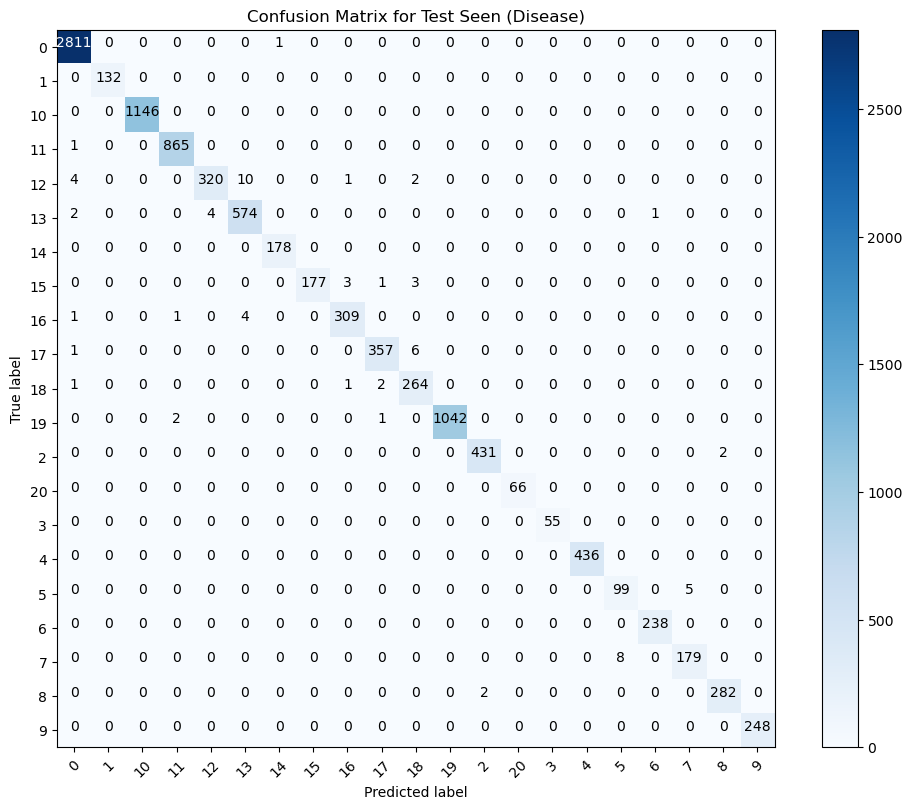


Harmonic Mean between Seen and Unseen of PV (Disease): 20.73%


In [11]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, top_k_accuracy_score
from scipy.stats import hmean
import itertools
import matplotlib.pyplot as plt

# Load the pre-trained models for disease classes
resnet50_disease_model = load_model(r'C:\Users\bheja\OneDrive\Desktop\models\resnet50v2_disease.h5')
densenet121_disease_model = load_model(r'C:\Users\bheja\OneDrive\Desktop\models\densenet121_disease.h5')

# Function to get predictions from the ensemble model using majority voting
def get_voting_predictions(models, generators):
    ensemble_predictions = []
    for generator in generators:
        # Get predictions from each model
        predictions = [model.predict(generator) for model in models]
        # Stack the predictions along a new axis to create a list of predictions
        predictions_stack = np.stack(predictions, axis=-1)
        # Get the average predictions across models
        avg_predictions = np.mean(predictions_stack, axis=-1)
        ensemble_predictions.append(avg_predictions)
    return ensemble_predictions

# Create the list of models and generators for disease classification
models_disease = [resnet50_disease_model, densenet121_disease_model]
generators_disease = [test_seen_generator_disease, test_unseen_generator_disease, doc_unseen_generator_disease]

# Get predictions from ensemble model for disease classification
ensemble_predictions_disease = get_voting_predictions(models_disease, generators_disease)

# Function to calculate accuracy
def calculate_accuracy(generator, predictions):
    true_labels = generator.classes
    predicted_labels = np.argmax(predictions, axis=-1)
    correct_predictions = np.sum(true_labels == predicted_labels)
    accuracy = correct_predictions / len(true_labels)
    return accuracy, predicted_labels

# Function to calculate top-k accuracy
def calculate_top_k_accuracy(generator, predictions, k):
    true_labels = generator.classes
    top_k_accuracy = top_k_accuracy_score(true_labels, predictions, k=k, labels=np.arange(predictions.shape[1]))
    return top_k_accuracy

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Calculate accuracy for each dataset
test_seen_accuracy_disease, test_seen_predicted_disease = calculate_accuracy(test_seen_generator_disease, ensemble_predictions_disease[0])
test_unseen_accuracy_disease, test_unseen_predicted_disease = calculate_accuracy(test_unseen_generator_disease, ensemble_predictions_disease[1])
doc_unseen_accuracy_disease, doc_unseen_predicted_disease = calculate_accuracy(doc_unseen_generator_disease, ensemble_predictions_disease[2])

# Calculate top-1 and top-5 accuracy for each dataset
test_seen_top1_accuracy_disease = calculate_top_k_accuracy(test_seen_generator_disease, ensemble_predictions_disease[0], k=1)
test_seen_top5_accuracy_disease = calculate_top_k_accuracy(test_seen_generator_disease, ensemble_predictions_disease[0], k=5)

test_unseen_top1_accuracy_disease = calculate_top_k_accuracy(test_unseen_generator_disease, ensemble_predictions_disease[1], k=1)
test_unseen_top5_accuracy_disease = calculate_top_k_accuracy(test_unseen_generator_disease, ensemble_predictions_disease[1], k=5)

doc_unseen_top1_accuracy_disease = calculate_top_k_accuracy(doc_unseen_generator_disease, ensemble_predictions_disease[2], k=1)
doc_unseen_top5_accuracy_disease = calculate_top_k_accuracy(doc_unseen_generator_disease, ensemble_predictions_disease[2], k=5)

# Print the results
print(f"Test Seen Accuracy (Disease): {test_seen_accuracy_disease:.2%}")
print(f"Test Seen Top-1 Accuracy (Disease): {test_seen_top1_accuracy_disease:.2%}")
print(f"Test Seen Top-5 Accuracy (Disease): {test_seen_top5_accuracy_disease:.2%}")

print(f"Test Unseen Accuracy (Disease): {test_unseen_accuracy_disease:.2%}")
print(f"Test Unseen Top-1 Accuracy (Disease): {test_unseen_top1_accuracy_disease:.2%}")
print(f"Test Unseen Top-5 Accuracy (Disease): {test_unseen_top5_accuracy_disease:.2%}")

print(f"Doc Unseen Accuracy (Disease): {doc_unseen_accuracy_disease:.2%}")
print(f"Doc Unseen Top-1 Accuracy (Disease): {doc_unseen_top1_accuracy_disease:.2%}")
print(f"Doc Unseen Top-5 Accuracy (Disease): {doc_unseen_top5_accuracy_disease:.2%}")

# Calculate confusion matrices for disease classification, ensuring all classes are represented
all_classes = np.arange(len(classes_list_disease))

test_seen_conf_matrix_disease = confusion_matrix(test_seen_generator_disease.classes, test_seen_predicted_disease, labels=all_classes)

# Plot confusion matrices
plot_confusion_matrix(test_seen_conf_matrix_disease, classes_list_disease, title="Confusion Matrix for Test Seen (Disease)")


# Calculate harmonic mean between seen and unseen of PV for disease classification
harmonic_mean_pv_disease = hmean([test_seen_accuracy_disease, test_unseen_accuracy_disease])
print(f"\nHarmonic Mean between Seen and Unseen of PV (Disease): {harmonic_mean_pv_disease:.2%}")
